# 12.4 Stochastic Gradient Descent

In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

## 12.4.1 Stochastic Gradient Updates

In deep learning, the objective function is usually the average of the loss functions for each example in the training dataset. Given a training dataset of n examples, we assume that fi(x) is the loss function with respect to the training example of index i, where x is the parameter vector. Then we arrive at the objective function:

$$
f(\mathbf{x}) = \cfrac{1}{n} \sum_{i=1}^n f_i(\mathbf{x})
$$

The gradient of the objective function at $\mathbf{x}$ is computed as

$$
\nabla f(\mathbf{x}) = \cfrac{1}{n} \sum_{i=1}^n \nabla f_i (\mathbf{x})
$$


If gradient descent is used, the computational cost for each independent variable iteration is O(n), which grows linearly with n. Therefore, when the training dataset is larger, the cost of gradient descent for each iteration will be higher.

Stochastic gradient descent (SGD) reduces computational cost at each iteration. At each iteration of stochastic gradient descent, we uniformly sample an index $i \in \{1, ..., n\}$ for data examples at random, and compute the gradient $\nabla f_i(\mathbf{x})$ to update $\mathbf{x}$:
$$
\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x})
$$

We can see that the computational cost for each iteration drops from $O(n)$ of the gradient descent to the constant $O(1)$. Moreover, we want to emphasize that the stochastic gradient $\nabla f_i(\mathbf{x})$ is an unbiased estimate of the full gradient $\nabla f(\mathbf{x})$ because

$$
\mathbb{E}_i \nabla f_i(\mathbf{x}) = \cfrac{1}{n} \sum_{i=1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x})
$$


epoch 50, x1: 0.316183, x2: 0.062681


/home/solee/miniconda3/envs/dive2dl/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


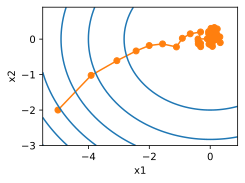

In [2]:
def f(x1, x2): # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2): # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

### 12.4.2 Dynamic Learning Rate

Replacing $\eta$ with a time-dependent rate $\eta(t)$ adds to the complexity of controlling convergence of an optimization algorithm. 

$$
\eta(t) = \eta_i \text{ piecewise constant} \\
\eta(t) = \eta_0 \cdot e^{- \lambda t} \\
\eta(t) = \eta_0 \cdot (\beta t + 1)^{-\alpha} \\
$$

In [3]:
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

epoch 1000, x1: -0.816750, x2: 0.017432


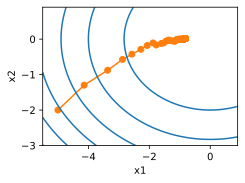

In [4]:
t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: 0.066364, x2: 0.013803


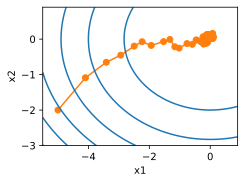

In [5]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))